In [105]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

# Evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
#from tensorflow.keras import layers, models, utils, datasets, wrappers
from tensorflow import keras
# For compatibility and best practices, use TensorFlow's Keras API consistently
# Importing necessary modules from TensorFlow's Keras API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [106]:
(X_train_digit,y_train_digit),(X_test_digit,y_test_digit) = mnist.load_data() # Hand-wriiten digits are loaded in Mnist
# Separate the data train and test set,X values are matrix format(Y original values converted in matrix format in X) and Y values are original number 

In [107]:
#X_train_digit

In [108]:
#y_train_digit

In [109]:
# Create column for labelling the datas
col_name = ["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]

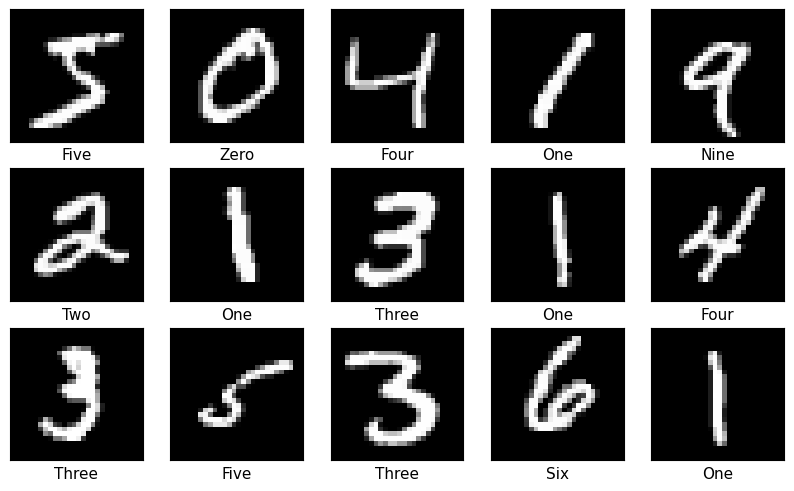

In [110]:
#Visulaize the Hand-written number of first 15 values 

plt.figure(figsize = (10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap= "gray")
    plt.xlabel(col_name[y_train_digit[i]])
plt.show()    
    

In [111]:
X_train_digit.shape 

(60000, 28, 28)

In [112]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

y_train_digit = to_categorical(y_train_digit,num_classes =10)
y_test_digit = to_categorical(y_test_digit,num_classes =10)

In [113]:
#Creating base neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(300, activation="relu", input_shape=(784,)),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])


C:\Users\nravi378\AppData\Local\anaconda3\envs\art\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
#Compling

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
#Fit and predict
history = model.fit(X_train_digit,y_train_digit,batch_size=100,epochs= 15,validation_data=(X_test_digit,y_test_digit))

Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8024 - loss: 3.3835 - val_accuracy: 0.9100 - val_loss: 0.3700
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9289 - loss: 0.2730 - val_accuracy: 0.9409 - val_loss: 0.2356
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9543 - loss: 0.1690 - val_accuracy: 0.9480 - val_loss: 0.2080
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9626 - loss: 0.1310 - val_accuracy: 0.9511 - val_loss: 0.2066
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9682 - loss: 0.1102 - val_accuracy: 0.9557 - val_loss: 0.1795
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9692 - loss: 0.1102 - val_accuracy: 0.9559 - val_loss: 0.1959
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9719 - loss: 0.0977 - val_accuracy: 0.9645 - val_loss: 0.1467
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9765 - loss: 0.0834 - val_accurac

In [140]:
y_predict = model.predict(X_test_digit)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[9.3163033e-11, 9.3429565e-01, 9.9945050e-01, ..., 1.0000000e+00,
        3.2535002e-01, 9.7427434e-01],
       [2.5981849e-03, 9.9588203e-01, 1.0000000e+00, ..., 9.9999958e-01,
        9.0745139e-01, 9.6163619e-01],
       [9.4501997e-09, 1.0000000e+00, 7.8255266e-01, ..., 1.7696920e-01,
        8.1506169e-01, 1.7357503e-01],
       ...,
       [2.9847304e-06, 9.1726422e-01, 9.9979067e-01, ..., 9.9996537e-01,
        9.8547339e-01, 9.9999797e-01],
       [1.0000000e+00, 7.5221324e-01, 9.9999994e-01, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.9999511e-01, 9.9253130e-01, ..., 1.2280097e-02,
        9.9080265e-01, 9.9999988e-01]], dtype=float32)

In [141]:
y_predicts = np.argmax(y_predict,axis =1)
y_test_digit_eval = np.argmax(y_test_digit,axis =1)


In [142]:
# confusion matrix
cm = confusion_matrix(y_test_digit_eval,y_predicts)
print(cm)

[[ 959    0    1    0    2    2    3    2    6    5]
 [   0 1120    0    4    1    1    1    2    5    1]
 [   1    1 1001   16    2    0    0    3    8    0]
 [   0    0  124  868    0    9    0    2    1    6]
 [   1    1   35    0  911    0    2    2    0   30]
 [ 402    1    0  236    4  237    2    0    6    4]
 [ 190   14   10    1  124   51  558    0    8    2]
 [   0   16  113  316    3    2    0  564    4   10]
 [   1    2    7   13    7    2    1    2  936    3]
 [   0    2    0    9    8    8    0    8    2  972]]


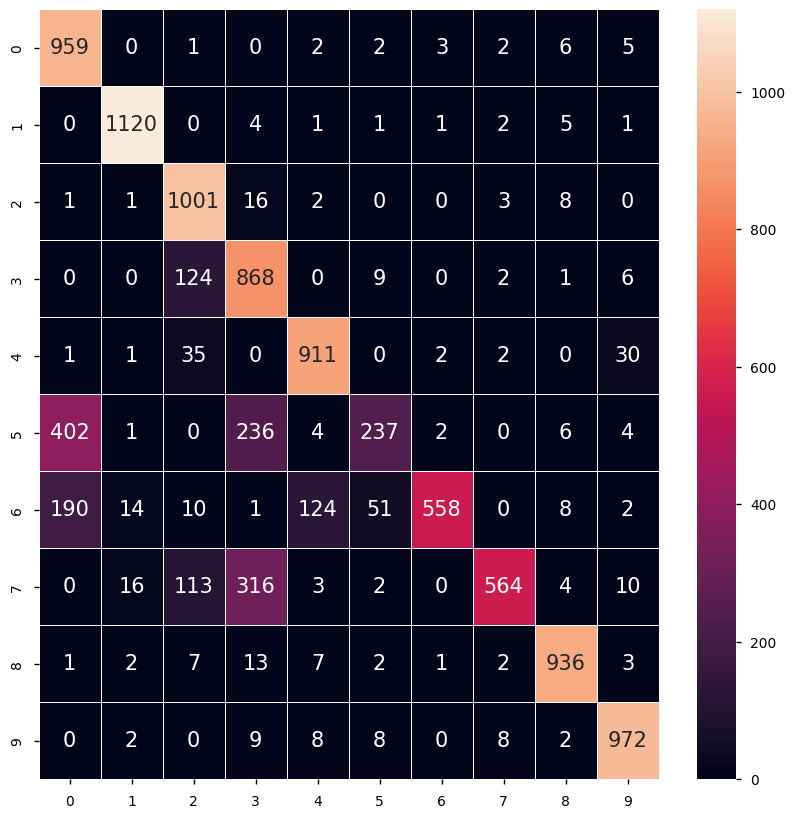

In [143]:
plt.style.use("seaborn-v0_8-notebook")
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d")
plt.show()

In [144]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [145]:
clf = classification_report(y_test_digit_eval,y_predicts)
print(clf)

              precision    recall  f1-score   support

           0       0.62      0.98      0.76       980
           1       0.97      0.99      0.98      1135
           2       0.78      0.97      0.86      1032
           3       0.59      0.86      0.70      1010
           4       0.86      0.93      0.89       982
           5       0.76      0.27      0.39       892
           6       0.98      0.58      0.73       958
           7       0.96      0.55      0.70      1028
           8       0.96      0.96      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.81     10000
   macro avg       0.84      0.80      0.79     10000
weighted avg       0.84      0.81      0.80     10000



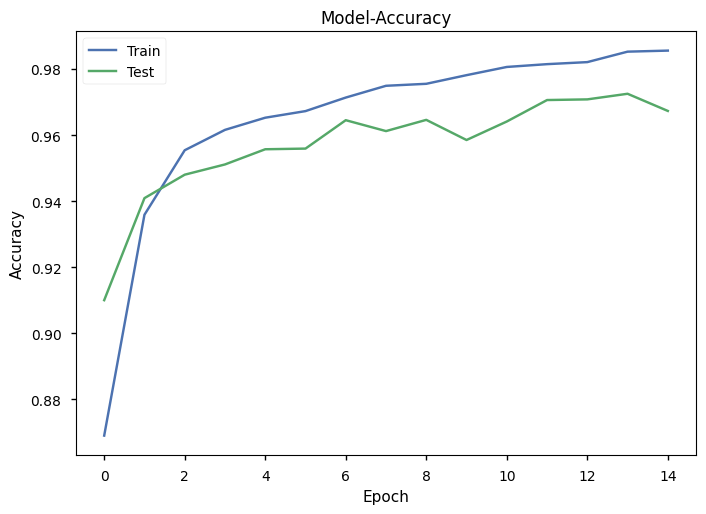

In [154]:
#graph for model accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model-Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"],loc="best")
plt.show()

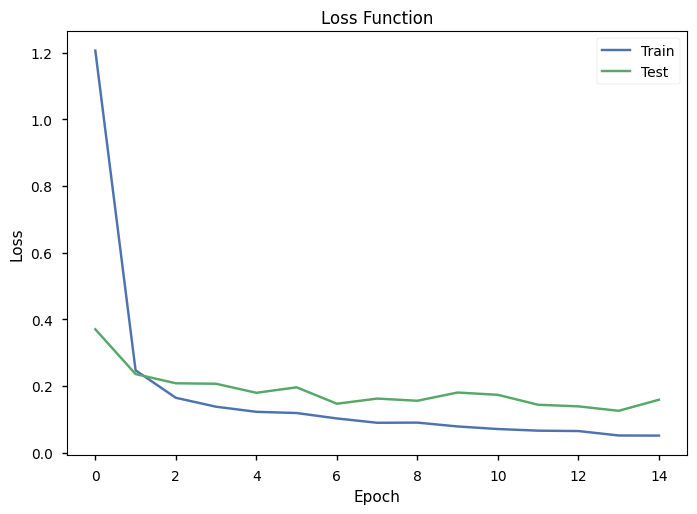

In [155]:
#Graph for loss function
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Function")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"],loc="best")
plt.show()

In [166]:
# Predict the single value
y_predict_single = model.predict(X_test_digit[[8]])
y_predicts_single = np.argmax(y_predict_single,axis =1)
y_test_digit_eval = np.argmax(y_test_digit,axis =1)
y_predicts_single[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


5

In [162]:
# Create column for labelling the datas
col_name = ["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]

Text(0.5, 0, 'Actual: Five , Pred : Five')

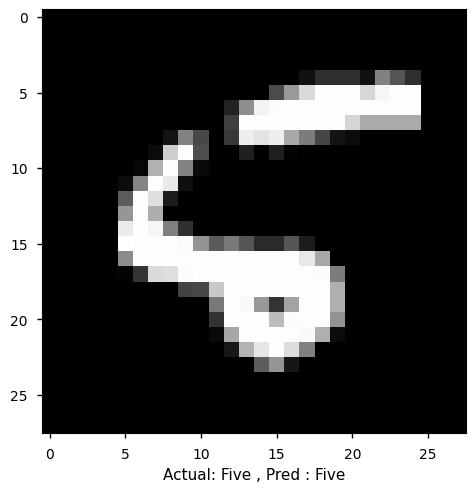

In [167]:
#visualizing the data.
plt.imshow(X_test_digit[8].reshape(28,28),cmap="gray")
plt.xlabel("Actual: {} , Pred : {}".format(col_name[y_test_digit_eval[8]],col_name[y_predicts_single[0]]))